just read the metadata

In [105]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from collections import Counter

The idea is to find duplicates from the metadata.

We simply concatenate author and title of the book and do a pair-wise fuzzy-string matching. 

Pro:
- easy-to-implement
- probably also scales to pair-wise comparison of 50,000x50,000 items

Con:
- we will only be able to find duplicates for which we have metadata (many books do not have a title/author.);
an alternative would be to compare the full texts. however that will be more expensive. different options are also fuzzy-string matching or comparing the distribution over words (e.g. via JSD)

In [106]:
## read the metadata
meta = pd.read_csv("../metadata/metadata.csv")

In [108]:
meta

,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
0,PG0,NaN,NaN,NaN,NaN,NaN,NaN,set(),Text
1,PG1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],602.0,"{'United States -- History -- Revolution, 1775...",Text
2,PG2,The United States Bill of Rights: The Ten Orig...,United States,NaN,NaN,['en'],110.0,"{'Civil rights -- United States -- Sources', '...",Text
3,PG3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],21.0,{'Presidents -- United States -- Inaugural add...,Text
4,PG4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],44.0,{'Consecration of cemeteries -- Pennsylvania -...,Text
5,PG5,The United States Constitution,United States,NaN,NaN,['en'],282.0,"{'United States. Constitution', 'United States...",Text
6,PG6,Give Me Liberty or Give Me Death,"Henry, Patrick",1736.0,1799.0,['en'],42.0,"{'Speeches, addresses, etc., American', 'Virgi...",Text
7,PG7,The Mayflower Compact,NaN,NaN,NaN,['en'],18.0,"{'Massachusetts -- History -- New Plymouth, 16...",Text
8,PG8,Abraham Lincoln's Second Inaugural Address,"Lincoln, Abraham",1809.0,1865.0,['en'],14.0,{'Presidents -- United States -- Inaugural add...,Text
9,PG9,Abraham Lincoln's First Inaugural Address,"Lincoln, Abraham",1809.0,1865.0,['en'],18.0,{'United States -- Politics and government -- ...,Text


In [176]:
## make alist concatenating author _ title as a single string for each entry
## we do not include items which have nan as both author and title
x_list = []
id_list = []
for id_,item in meta.iterrows():
    str_ = str(item.author)+'_'+str(item.title)
    if str_ != 'nan_nan':
        x_list+=[str_]
        id_list += [id_]

In [177]:
len(x_list)

55289

In [178]:
id_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 200,
 201,
 202,
 203

pip install fuzzywuzzy

pip install python-Levenshtein

In [175]:
x_list[0]


'nan_nan'

In [179]:
N = len(x_list)
N

55289

## Distribution of fuzzy-scores

In [182]:
list_scores = []
for i0 in range(100):
    s0 = x_list[i0]
    for i1 in range(N):
        if i1!=i0:
            s1=x_list[i1]
            score = fuzz.ratio(s0,s1)
            list_scores+=[score]

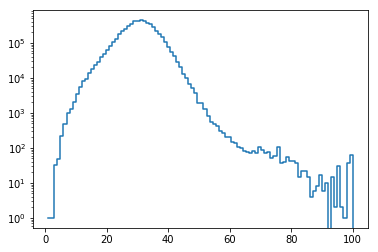

In [183]:
H,edges = np.histogram(list_scores,bins=100)
H=np.append(H,0)
plt.step(edges,H,where='post')
plt.yscale('log')

The distribution shows there is no clear cutoff .
However, it seems that for fs>80, we could check manually.

## Check some matches above a threshold

In [192]:
fs_crit = 80    
list_match = []

for i0 in range(100):
    s0 = x_list[i0]
    for i1 in range(N):
        if i1!=i0:
            s1=x_list[i1]
            fs = fuzz.ratio(s0,s1)
            if fs > fs_crit:
                list_match+=[(i0,i1,fs)]

In [193]:
len(list_match)

359

In [194]:
for i0,i1,fs in list_match:
    print(x_list[i0],i0)
    print(x_list[i1],i1)
    print(fs)
    print('')

Jefferson, Thomas_The Declaration of Independence of the United States of America 0
Jefferson, Thomas_The Declaration of Independence of The United States of America 16708
99

Jefferson, Thomas_The Declaration of Independence of the United States of America 0
Jefferson, Thomas_Declaration of Independence of the United States of America 19713
97

United States_The United States Constitution 4
United States_Amendments to the United States Constitution 19509
84

United States_The United States Constitution 4
United States_Amendments to the United States Constitution 19510
84

Henry, Patrick_Give Me Liberty or Give Me Death 5
Henry, Patrick_Give Me Liberty or Give Me Death 19974
100

Lincoln, Abraham_Abraham Lincoln's Second Inaugural Address 7
Lincoln, Abraham_Abraham Lincoln's First Inaugural Address 8
91

Lincoln, Abraham_Abraham Lincoln's First Inaugural Address 8
Lincoln, Abraham_Abraham Lincoln's Second Inaugural Address 7
91

Carroll, Lewis_Alice's Adventures in Wonderland 10
Carrol

Burroughs, Edgar Rice_The Monster Men 95
Burroughs, Edgar Rice_The Mucker 8762
84

Abbott, Edwin Abbott_Flatland: A Romance of Many Dimensions 96
Abbott, Edwin Abbott_Flatland: A Romance of Many Dimensions (Illustrated) 182
89

Abbott, Edwin Abbott_Flatland: A Romance of Many Dimensions 96
Abbott, Edwin Abbott_Flatland: A Romance of Many Dimensions 45434
100

Dickens, Charles_A Tale of Two Cities 97
Dickens, Charles_A Tale of Two Cities 7825
100



A single threshold in the fuzzy-score is unable to capture all the different cases present in the data, i.e. we will always match cases that at are different and not match cases that are the same.

Some examples of matches and their fs-score:


United States. Central Intelligence Agency_The 1992 CIA World Factbook 47
United States. Central Intelligence Agency_The 1998 CIA World Factbook 1984
99

Wells, H. G. (Herbert George)_The War of the Worlds 35
Wells, H. G. (Herbert George)_War of the Worlds 26218
96

nan_The Bible, King James Version, Complete 29
Anonymous_The Bible, King James Version, Complete Contents 7955
83

United States_The United States Constitution 4
United States_Amendments to the United States Constitution 19509
84

Jefferson, Thomas_The Declaration of Independence of the United States of America 0
Jefferson, Thomas_Declaration of Independence of the United States of America 19713
97